In [550]:
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sn

In [645]:
class ValuesGenerator():
    def __init__(self, key=None):
        self.key = key
        self.values_lookup = {}
        
    def update_values_lookup(self, n):
        if n in self.values_lookup:
            print(f"Already know value for {n}, skipping")
            return
        preds = G.pred[n]
        if not preds:
            print(f"Parent node {n}")
            value = G.nodes[n].get(self.key, n)
        else:
            print(f"Child node {n}")
            val_temp = 0
            for p in preds:
                if p not in self.values_lookup:
                    self.update_values_lookup(p)
                val_temp = val_temp + preds[p]["weight"] * G.nodes[p].get(self.key, p)
            value = val_temp + G.nodes[n].get(self.key, n)
        self.values_lookup[n] = value


    def build_graph_values(self, G):
        self.values_lookup = {}
        stack = list(G.nodes)
        counter = 0
        np.random.shuffle(stack)
        while stack:
            n = stack.pop()
            self.update_values_lookup(n)
            counter = counter + 1
        return self.values_lookup

def draw_dag(G):
    pos = nx.spring_layout(G)
    edge_labels = nx.get_edge_attributes(G,'weight')
    print(G.nodes)
    node_labels = {n: G.nodes[n].get("name", n) for n in G.nodes}
    print(node_labels)
    nx.draw_networkx(G,pos=pos, with_labels=False)
    nx.draw_networkx_labels(G,pos, labels=node_labels)
    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

In [634]:
valgen = ValuesGenerator()

Child node 3
Parent node 1
Already know value for 1, skipping
Child node 2


{1: 1, 3: 5, 2: 3}

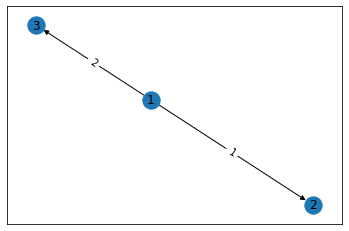

In [635]:
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3])
# G.add_edges_from([(1, 2), (1, 3)])
G.add_edge(1, 2, weight=1)
G.add_edge(1, 3, weight=2)

draw_dag(G)
valgen.build_graph_values(G)

Parent node 1
Child node 3
Child node 2
Already know value for 2, skipping


{1: 1, 2: 3, 3: 8}

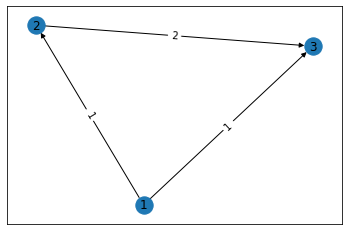

In [636]:
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3])
# G.add_edges_from([(1, 2), (1, 3)])
G.add_edge(1, 2, weight=1)
G.add_edge(1, 3, weight=1)
G.add_edge(2, 3, weight=2)
draw_dag(G)
valgen.build_graph_values(G)

Child node 3
Parent node 1
Child node 2
Child node 4
Already know value for 2, skipping
Already know value for 4, skipping
Already know value for 1, skipping


{1: 1, 2: 3, 4: 5, 3: 14}

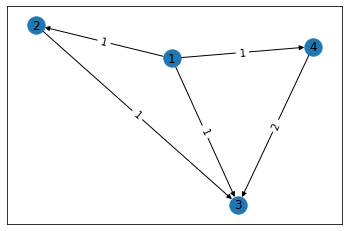

In [426]:
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3, 4])
# G.add_edges_from([(1, 2), (1, 3)])
G.add_edge(1, 2, weight=1)
G.add_edge(1, 3, weight=1)
G.add_edge(1, 4, weight=1)
G.add_edge(2, 3, weight=1)
G.add_edge(4, 3, weight=2)
draw_dag(G)
valgen.build_graph_values(G)

Child node 3
Parent node 1
Child node 2
Child node 4
Already know value for 1, skipping
Already know value for 4, skipping
Already know value for 2, skipping


{1: 1, 2: 3, 4: 5, 3: 14}

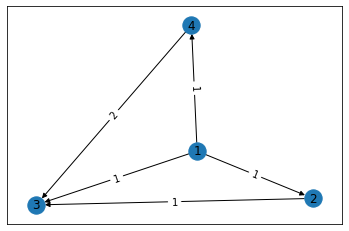

In [427]:
G = nx.DiGraph()
G.add_nodes_from([1, 2, 3, 4])
# G.add_edges_from([(1, 2), (1, 3)])
G.add_edge(1, 2, weight=1)
G.add_weighted_edges_from([(1, 3, 1), (1, 4, 1), (1, 4, 1)])
G.add_weighted_edges_from([(2, 3, 1)])
G.add_weighted_edges_from([(4, 3, 2)])
draw_dag(G)
valgen.build_graph_values(G)

### Try and draw labels

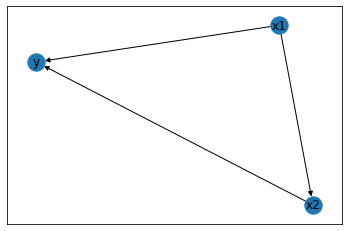

In [389]:
G = nx.DiGraph()
nodes = {1: {"name": "x1"}}
G.add_node(1, value=1, name="x1")
G.add_node(2, value=1, name="x2")
G.add_node(3, value=2, name="y")
G.add_weighted_edges_from([(1, 2, 1)])
G.add_weighted_edges_from([(2, 3, 1)])
G.add_weighted_edges_from([(1, 3, 2)])
# G.add_edges_from([(1, 2), (1, 3)])
labels = {}
for n in G.nodes:
    labels[n] = G.nodes[n]["name"]
pos = nx.spring_layout(G)

nx.draw_networkx(G,pos=pos, with_labels=False)
_ = nx.draw_networkx_labels(G,pos=pos, labels=labels)

## Adjacency matrix


$$ x_1 \sim \mathcal{N} $$
$$ x_2 \sim \alpha_{1,2} x_1 +  \mathcal{N} $$
$$ x_3 \sim \alpha_{1,3} x_1 +  \alpha_{2,3} x_2 + \mathcal{N}  $$

$$
A = 
\begin{pmatrix}
0 & \alpha_{1,2} & \alpha_{1,3}\\
0 & 0 & \alpha_{2,3}\\
0 & 0 & 0
\end{pmatrix}
$$

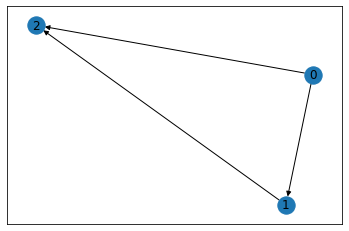

In [428]:
adj_mat = np.array([[0, 1, 1], [0, 0, 1], [0, 0, 0]])
G2 = nx.from_numpy_matrix(adj_mat, create_using=nx.DiGraph)
pos = nx.spring_layout(G2)
nx.draw_networkx(G2,pos=pos)

## Graph of Objects

In [499]:
class Value():
    def __init__(self, name, val):
        self.name = name
        self._value = val
        
    @property
    def value(self):
        return self._value
        

In [538]:
class Vectors():
    def __init__(self, name, n=10):
        self.name = name
        self._value = np.random.normal(0, 1, n)
        
    @property
    def value(self):
        return self._value

In [539]:
a = Value("x0", 5)
print(a.name, a.value)

x0 5


### Example with dictionaries

In [540]:
G = nx.DiGraph()
G.add_node(1, value=1, name="x1")
G.add_node(2, value=3, name="x2")

for n in G.nodes(data=True):
    print(n)

(1, {'value': 1, 'name': 'x1'})
(2, {'value': 3, 'name': 'x2'})


## Insert class values into a dict

It seems like networkx expects dicts

### Values()

In [541]:
G = nx.DiGraph()

for n, val in enumerate([4, 5, 6]):
#     G.add_node(n, name=f"x{n}", value=Value(val).value)
    v = Value(f"x{n}", val)
    G.add_node(v.name, value=v.value)

G.add_weighted_edges_from([("x1", "x2", 1)])
    
for n in G.nodes(data=True):
    print(n)

('x0', {'value': 4})
('x1', {'value': 5})
('x2', {'value': 6})


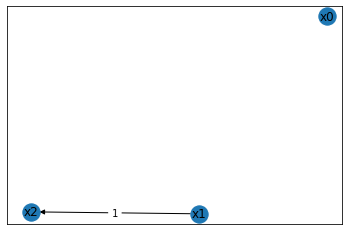

In [542]:
# pos = nx.spring_layout(G)
# nx.draw_networkx(G,pos=pos)
draw_dag(G)

In [543]:
valgen_key = ValuesGenerator("value")
valgen_key.build_graph_values(G)

Parent node x0
Child node x2
Parent node x1
Already know value for x1, skipping


{'x0': 4, 'x1': 5, 'x2': 11}

### Vectors()

[0, 1, 2]
{0: 'x0', 1: 'x1', 2: 'x2'}


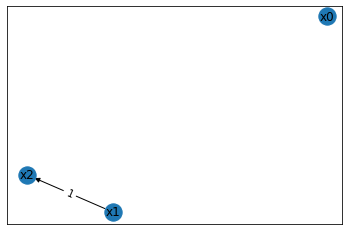

In [646]:
G = nx.DiGraph()
for n, val in enumerate([4, 5, 6]):
    v = Vectors(f"x{n}", 100)
    G.add_node(n, name=v.name, value=v.value)
G.add_weighted_edges_from([(1, 2, 1)])
draw_dag(G)

In [647]:
valgen_key = ValuesGenerator("value")
data = valgen_key.build_graph_values(G)
df = pd.DataFrame(data)

Parent node 0
Child node 2
Parent node 1
Already know value for 1, skipping


In [648]:
df.head()

,0,1,2
0,1.468746,-2.646532,-2.806202
1,0.441289,1.418687,0.937436
2,-0.634718,0.696947,-1.222344
3,1.818319,0.990570,1.321275
4,0.242521,-0.248508,-1.217693


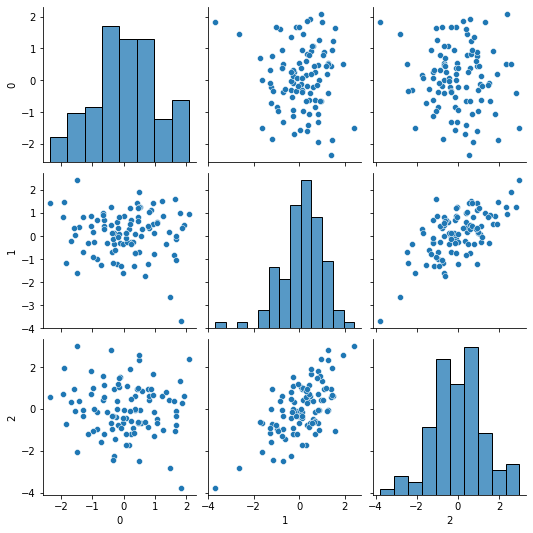

In [649]:
sn.pairplot(df)

### Vectors with adj matrix

['x0', 'x1', 'x2']
{'x0': 'x0', 'x1': 'x1', 'x2': 'x2'}


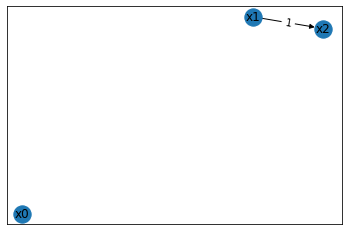

In [650]:
G = nx.DiGraph()
for n, val in enumerate([4, 5, 6]):
    v = Vectors(f"x{n}", 100)
    G.add_node(v.name, value=v.value)
G.add_weighted_edges_from([("x1", "x2", 1)])
draw_dag(G)

In [651]:
adj_mat = np.array([[0, 1, 1], [0, 0, 1], [0, 0, 0]])
G = nx.from_numpy_matrix(adj_mat, create_using=nx.DiGraph)
for n in G.nodes:
    print(n)
    
edges = nx.to_dict_of_dicts(G)
print(edges)

0
1
2
{0: {1: {'weight': 1}, 2: {'weight': 1}}, 1: {2: {'weight': 1}}, 2: {}}


[0, 1, 2]
{0: 'x0', 1: 'x1', 2: 'x2'}


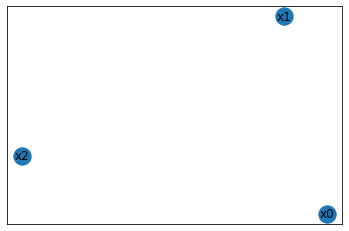

In [656]:
Gtemp = G = nx.DiGraph()
for n, val in enumerate([4, 5, 6]):
    v = Vectors(f"x{n}", 100)
    G.add_node(n, name=v.name, value=v.value)
draw_dag(G)

In [657]:
for i in range(adj_mat.shape[0]):
    for j in range(adj_mat.shape[1]):
        if adj_mat[i][j] != 0:
            G.add_edge(i, j, weight = adj_mat[i][j])

[0, 1, 2]
{0: 'x0', 1: 'x1', 2: 'x2'}


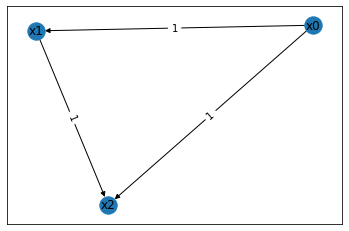

In [658]:
draw_dag(G)

300
red


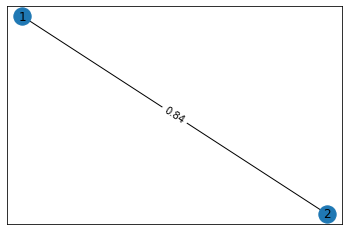

In [604]:
G = nx.Graph()
G.add_edge(1, 2, color='red', weight=0.84, size=300)
print(G[1][2]['size'])

print(G.edges[1, 2]['color'])
draw_dag(G)

In [608]:
G.nodes[1]

{}

In [609]:
G.add_node("blah")

In [611]:
G.nodes["blah"]

{}